In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
'''
Feather is a fast, lightweight, and easy-to-use binary file format for storing data 
It shows high I/O speed, doesn't take too much memory on the disk and doesn't need any unpacking 
when loaded back into RAM.
Feather has max I/O speed
'''

"\nFeather is a fast, lightweight, and easy-to-use binary file format for storing data \nIt shows high I/O speed, doesn't take too much memory on the disk and doesn't need any unpacking \nwhen loaded back into RAM.\nFeather has max I/O speed\n"

In [3]:
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pyarrow
df=pd.read_feather(r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/E_commerce_Analysis/Sales_data.ftr')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df=df.dropna(how='all')
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
# Dropping the duplicate values
df[df.duplicated()]
df=df.drop_duplicates()
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
df['Order Date'][0].split('/')[0] # extracting month from "Order Date"

'04'

In [10]:
def return_month(x):
    return x.split('/')[0]

In [11]:
df['Month']=df['Order Date'].apply(return_month)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [12]:
df['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [13]:
filter1=df['Month']=='Order Date'
df[filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [14]:
df.drop(index=519,inplace=True)
df[filter1]

/var/folders/6b/1hdxxqbn1gx40rtc5xgkfkqc0000gn/T/ipykernel_1018/1396476794.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[filter1]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [15]:
df['Month']=df['Month'].astype(int)

In [16]:
'''
Alternate syntax for above operation:
filter1 = all_data['Month'] == 'Order Date'
all_data[~filter1]
~ gives the complement of what we have asked for (all instances that return false)
'''

"\nAlternate syntax for above operation:\nfilter1 = all_data['Month'] == 'Order Date'\nall_data[~filter1]\n~ gives the complement of what we have asked for (all instances that return false)\n"

In [17]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [19]:
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df['Price Each']=df['Price Each'].astype(float)
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [20]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] # creating Sales feature
df['Sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Sales, Length: 185686, dtype: float64

In [21]:
# Finding the monthly sales
df.groupby('Month')['Sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

<Axes: xlabel='Month'>

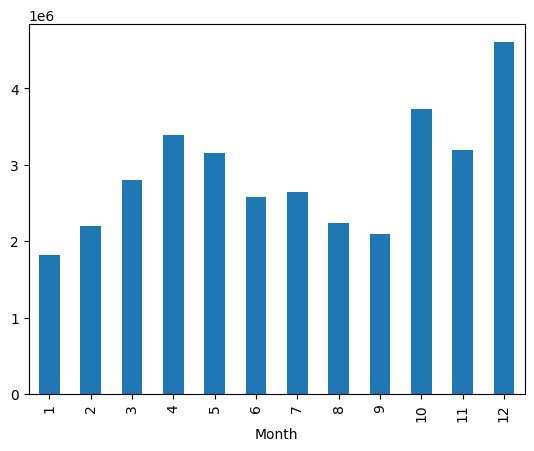

In [22]:
df.groupby(['Month'])['Sales'].sum().plot(kind='bar')

In [23]:
df['Purchase Address'][6].split(',') # extracting city from "Purchase Address"
def return_city(x):
    return x.split(',')[1]

In [24]:
df['City']=df['Purchase Address'].apply(return_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [25]:
df['City'].value_counts()

City
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

<Axes: ylabel='count'>

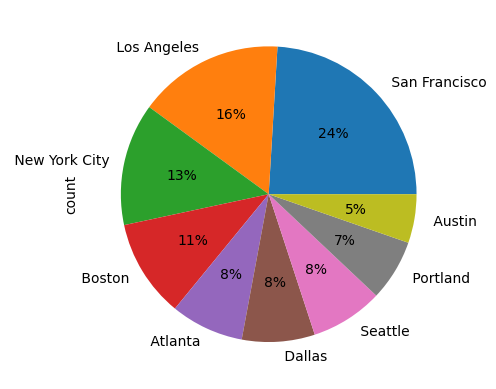

In [26]:
df['City'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [27]:
# Which product is sold the most?
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [28]:
count_df = df.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'})
'''
.groupby(['Product']): This method groups the data in `all_data` by the unique values in the 'Product' column. 
Each unique product will form a separate group.

.agg({...}): The agg() method allows you to apply aggregate functions to the grouped data. 
The argument to `agg()` is a dictionary where:
1. The keys are the names of the columns you want to aggregate.
2. The values are the aggregation functions you want to apply.
'''

"\n.groupby(['Product']): This method groups the data in `all_data` by the unique values in the 'Product' column. \nEach unique product will form a separate group.\n\n.agg({...}): The agg() method allows you to apply aggregate functions to the grouped data. \nThe argument to `agg()` is a dictionary where:\n1. The keys are the names of the columns you want to aggregate.\n2. The values are the aggregation functions you want to apply.\n"

In [29]:
count_df.head()

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84


In [30]:
count_df=count_df.reset_index()

Text(0, 0.5, 'Avg price of product')

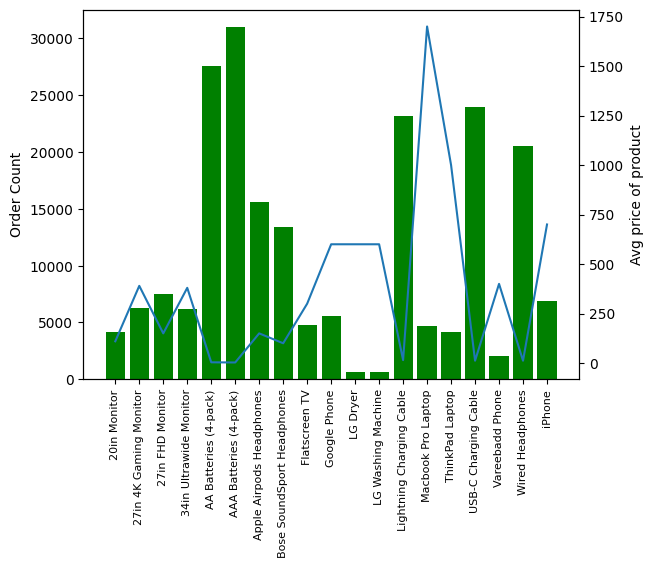

In [31]:
y=count_df['Product'].values
fig , ax1 = plt.subplots()
ax2 = ax1.twinx() # as X-axis is same for both plots , ie we are sharing x-axis , ie we have to use ax2 = ax1.twinx()
ax1.bar(count_df['Product'] , count_df['Quantity Ordered'] , color='g')
ax2.plot(count_df['Product'] , count_df['Price Each'] )
ax1.set_xticklabels(y , rotation='vertical' , fontsize=8 )
ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

In [34]:
# Finding the trends of the most sold products
most_sold_df=df['Product'].value_counts()[0:5].index   
df['Product'].value_counts()[0:5].values   

array([21859, 21610, 20612, 20558, 18849])

In [35]:
most_sold_df

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [39]:
most_sold=df[df['Product'].isin(most_sold_df)]
most_sold.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [41]:
df2=pd.crosstab(most_sold.Month,most_sold.Product)
df2.head()

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729


In [42]:
''' 
Alternate Syntax:
most_sold_product_df.groupby(['Month' , 'Product']).size()
pivot = most_sold_product_df.groupby(['Month' , 'Product']).size().unstack()
'''

" \nAlternate Syntax:\nmost_sold_product_df.groupby(['Month' , 'Product']).size()\npivot = most_sold_product_df.groupby(['Month' , 'Product']).size().unstack()\n"

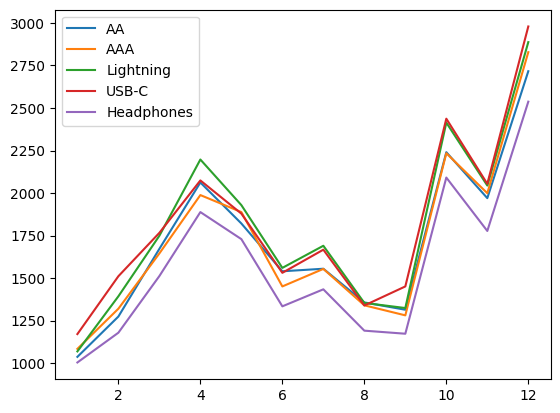

In [47]:
plt.plot(df2['AA Batteries (4-pack)'],label='AA')
plt.plot(df2['AAA Batteries (4-pack)'],label='AAA')
plt.plot(df2['Lightning Charging Cable'],label='Lightning')
plt.plot(df2['USB-C Charging Cable'],label='USB-C')
plt.plot(df2['Wired Headphones'],label='Headphones')
plt.legend()
plt.show()

In [55]:
# Analyzing which Products are sold together
df_duplicate=df[df['Order ID'].duplicated(keep=False)]
df_duplicate.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco


In [63]:
dup_products = df_duplicate.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})
dup_products.head()

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"


In [64]:
dup_products_df = df_duplicate.merge(dup_products,how='left',on='Order ID')
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [65]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID'])
no_dup_df.shape

(6879, 10)

In [67]:
no_dup_df['grouped_products'].value_counts()

grouped_products
iPhone,Lightning Charging Cable                                          886
Google Phone,USB-C Charging Cable                                        857
iPhone,Wired Headphones                                                  361
Vareebadd Phone,USB-C Charging Cable                                     312
Google Phone,Wired Headphones                                            303
                                                                        ... 
iPhone,Lightning Charging Cable,Wired Headphones,USB-C Charging Cable      1
Vareebadd Phone,27in FHD Monitor                                           1
iPhone,Google Phone                                                        1
ThinkPad Laptop,LG Dryer                                                   1
LG Washing Machine,AA Batteries (4-pack)                                   1
Name: count, Length: 350, dtype: int64

In [71]:
x=no_dup_df['grouped_products'].value_counts()[0:5].index
y=no_dup_df['grouped_products'].value_counts()[0:5].values
print(x)
print()
print(y)

Index(['iPhone,Lightning Charging Cable', 'Google Phone,USB-C Charging Cable',
       'iPhone,Wired Headphones', 'Vareebadd Phone,USB-C Charging Cable',
       'Google Phone,Wired Headphones'],
      dtype='object', name='grouped_products')

[886 857 361 312 303]


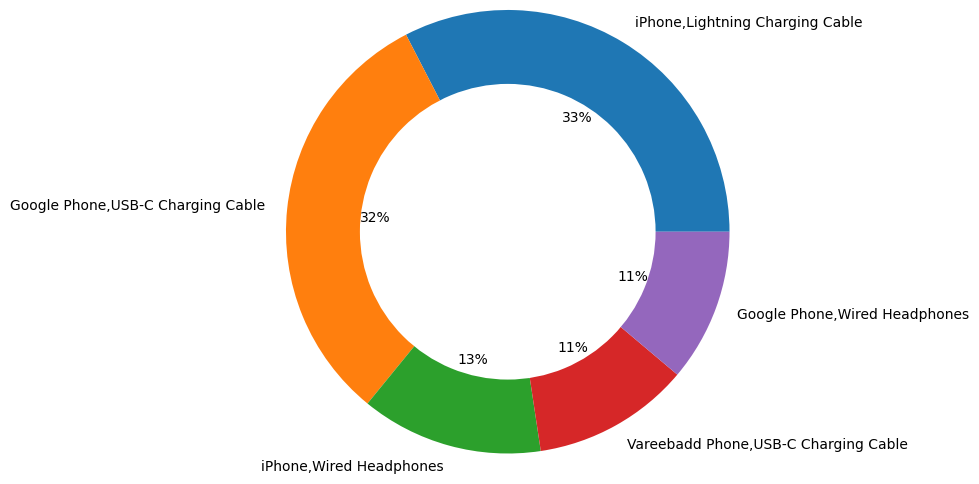

In [74]:
plt.pie(y,labels=x,radius=1.5,autopct='%1.0f%%')
plt.pie([1],colors='white')
plt.show()